In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
objective_goal = {
 'FE_MEBT:BPM_D1056:XPOS_RD': -0.3960103833349608,
 'FE_MEBT:BPM_D1056:YPOS_RD': 0.6678681961462211,
 'FE_MEBT:BPM_D1056:PHASE_RD': 78.75262742941518,
 'FE_MEBT:BPM_D1072:XPOS_RD': 0.18746895673132966,
 'FE_MEBT:BPM_D1072:YPOS_RD': 0.19623165740431964,
 'FE_MEBT:BPM_D1072:PHASE_RD': -25.102889168544564,
 'FE_MEBT:BPM_D1094:XPOS_RD': -0.18243672772460348,
 'FE_MEBT:BPM_D1094:YPOS_RD': -1.0409382935331426,
 'FE_MEBT:BPM_D1094:PHASE_RD': -17.109880065240283
}

XPOS = [col for col in objective_goal.keys() if 'XPOS' in col ]
Xgoal = [objective_goal[pv] for pv in XPOS]
YPOS = [col for col in objective_goal.keys() if 'YPOS' in col ]
Ygoal = [objective_goal[pv] for pv in YPOS]
PHASE = [col for col in objective_goal.keys() if 'PHASE' in col ]
PHgoal = [objective_goal[pv] for pv in PHASE]

BPMlabel = [col[8:17] for col in objective_goal.keys() if 'XPOS' in col ]

In [3]:
fname_base = '20250710_2002[48Ca10][savo][MEBT]beamtest_'
files = [
    fname_base+'ES',
    fname_base+'ES_adamSG',
    fname_base+'ES_SG',
    fname_base+'ES_UncertainSG',
    fname_base+'SG',
]
files = [f+'.pkl' for f in files]

In [4]:
def plot_savo_file(fname):
    data = pickle.load(open(fname,"rb"))
    fig,ax = plt.subplots(1,3,figsize=(12,2.5),dpi=128)
    ax[0].plot(data['y'])
    ax[0].set_xlabel('epoch');
    ax[0].set_ylabel('composite objective');
    ax[1].plot(data['cpu_time']);
    ax[1].set_xlabel('epoch');
    ax[1].set_ylabel('wall time');
    if 'model_fit_time' in data:
        ax[2].plot(data['model_fit_time']);
        ax[2].set_xlabel('epoch');
        ax[2].set_ylabel('model training time');
    fig.tight_layout()

    eval_data = pickle.load(open(fname.replace('.pkl','_eval.pkl'),"rb"))

    fig,ax = plt.subplots(1,4,figsize=(15,2.5),dpi=128)
    ax[0].plot(eval_data[XPOS].iloc[ 0]-Xgoal,label='init')
    ax[0].plot(eval_data[XPOS].iloc[-1]-Xgoal,label='final')
    ax[0].set_ylabel('XPOS (mm)');
    ax[0].set_xticks(range(len(BPMlabel)));
    ax[0].set_xticklabels(BPMlabel,rotation=45);
    ax[0].legend()
    ax[1].plot(eval_data[YPOS].iloc[ 0]-Ygoal,label='init')
    ax[1].plot(eval_data[YPOS].iloc[-1]-Ygoal,label='final')
    ax[1].set_ylabel('YPOS (mm)');
    ax[1].set_xticks(range(len(BPMlabel)));
    ax[1].set_xticklabels(BPMlabel,rotation=45);
    ax[1].legend()
    ax[2].plot(eval_data[PHASE].iloc[ 0]-PHgoal,label='init')
    ax[2].plot(eval_data[PHASE].iloc[-1]-PHgoal,label='final')
    ax[2].set_ylabel('PHASE (deg)');
    ax[2].set_xticks(range(len(BPMlabel)));
    ax[2].set_xticklabels(BPMlabel,rotation=45);
    ax[2].legend()
    ax[3].plot(eval_data['FE_MEBT:BCM_D1055:AVGPK_RD'].values,label='BCM')
    ax[3].plot(eval_data['FE_MEBT:FC_D1102:PKAVG_RD'].values,label='FCcup')
    ax[3].set_xlabel('epoch');
    ax[3].set_ylabel('uA');
    ax[3].legend()
    fig.tight_layout()

===  20250710_2002[48Ca10][savo][MEBT]beamtest_ES.pkl ===
(30,)


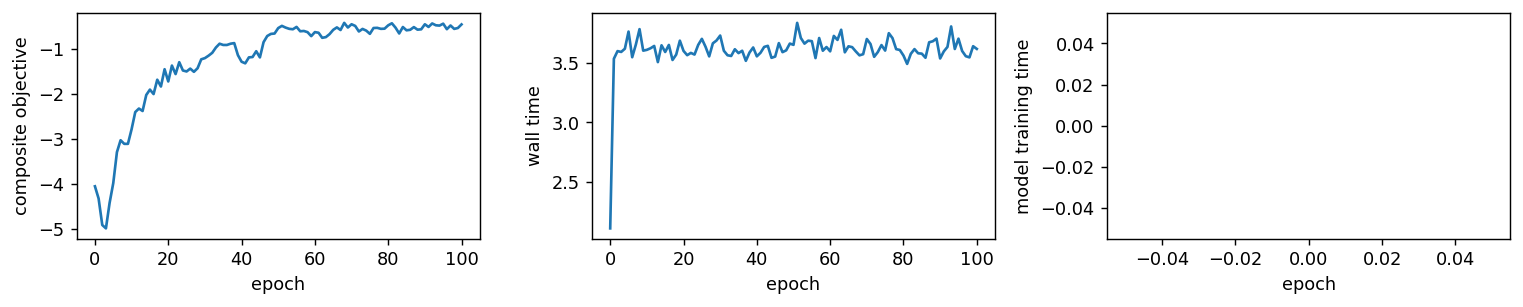

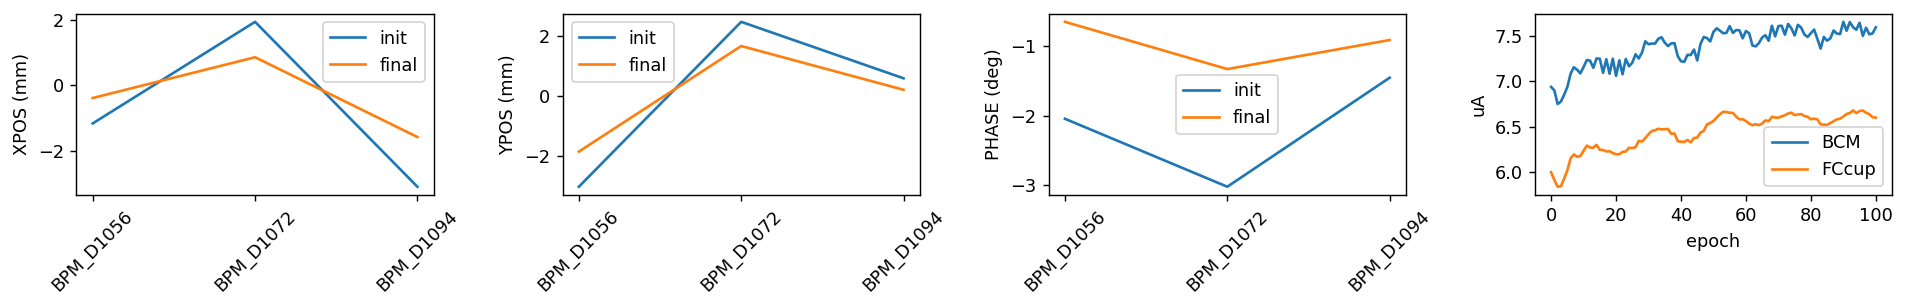

===  20250710_2002[48Ca10][savo][MEBT]beamtest_ES_adamSG.pkl ===
(30,)


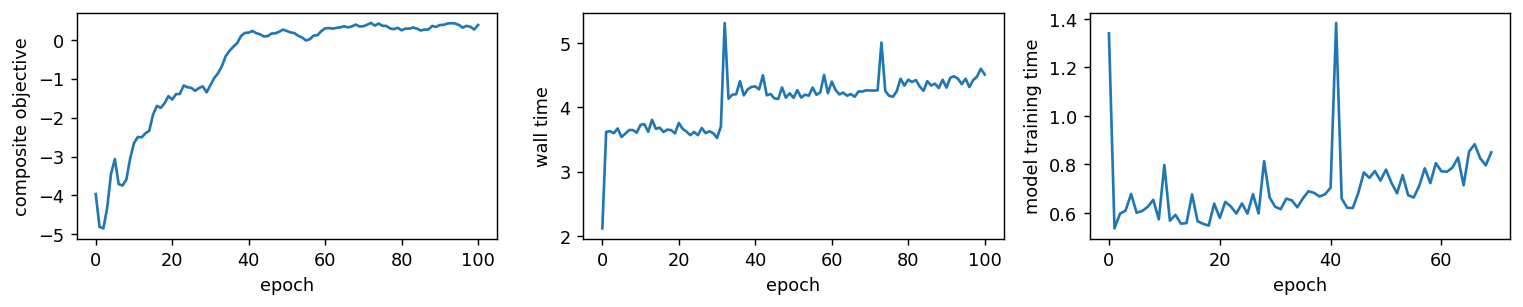

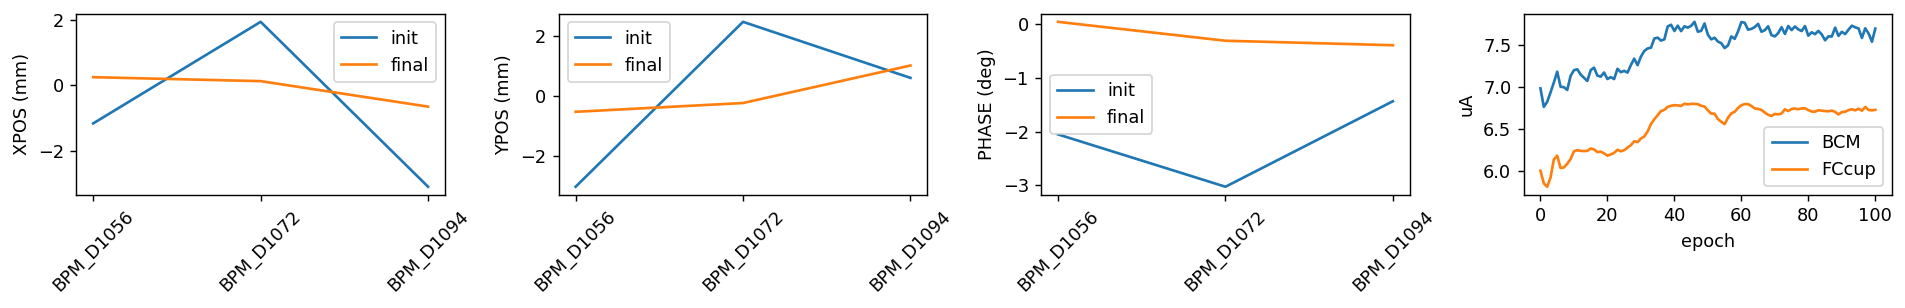

===  20250710_2002[48Ca10][savo][MEBT]beamtest_ES_SG.pkl ===
(30,)


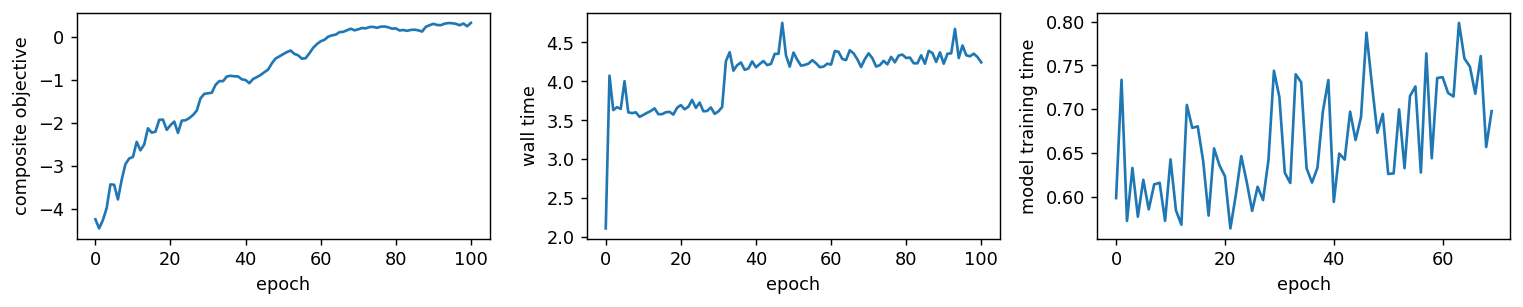

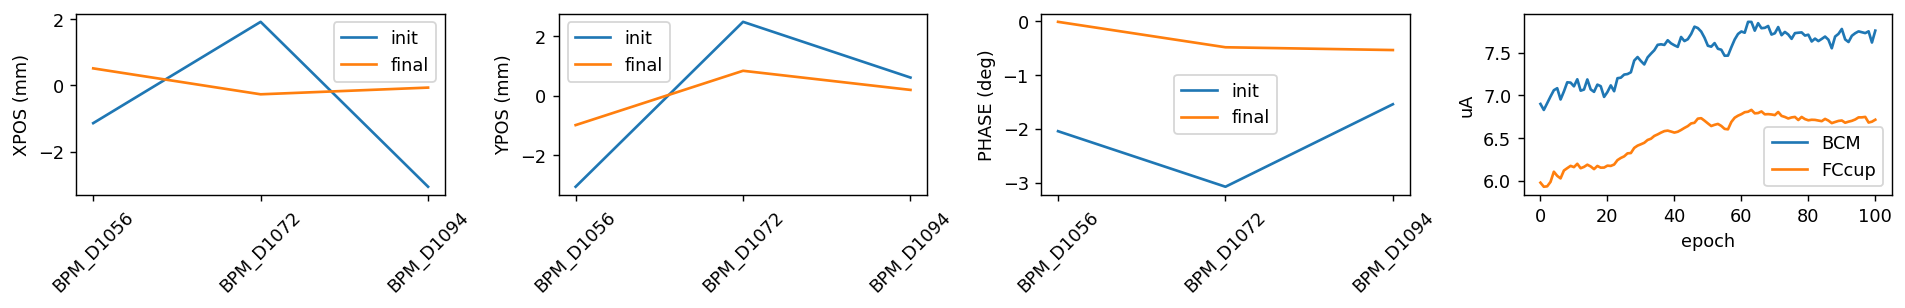

===  20250710_2002[48Ca10][savo][MEBT]beamtest_ES_UncertainSG.pkl ===
(30,)


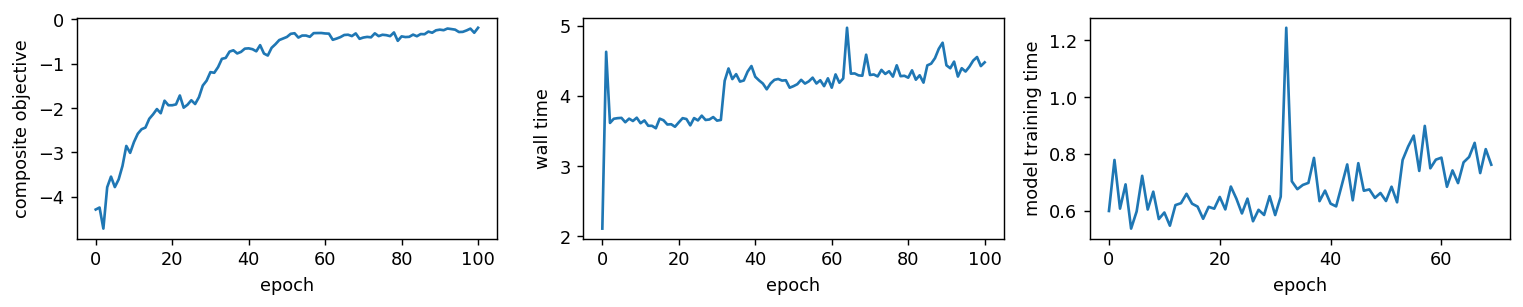

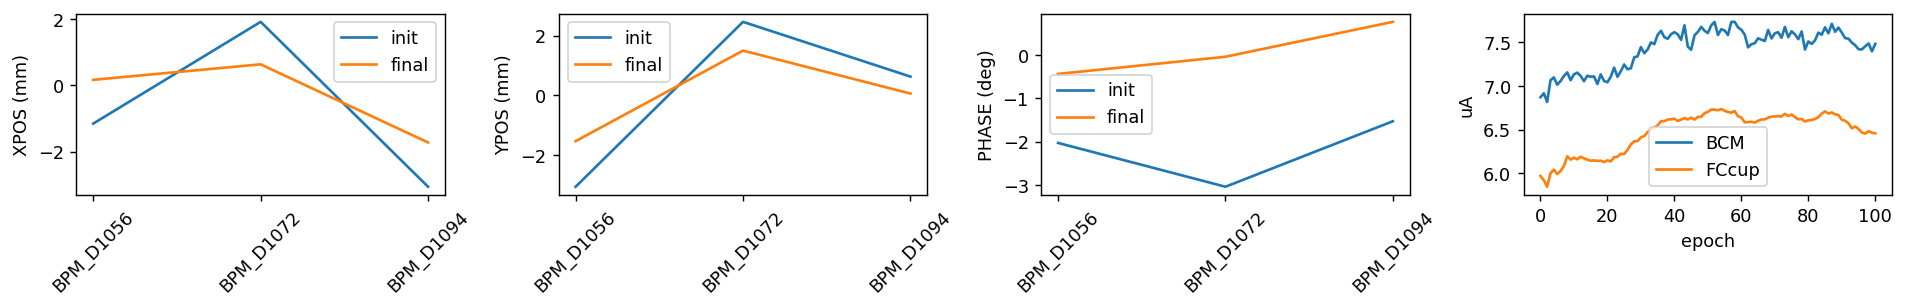

===  20250710_2002[48Ca10][savo][MEBT]beamtest_SG.pkl ===
(30,)


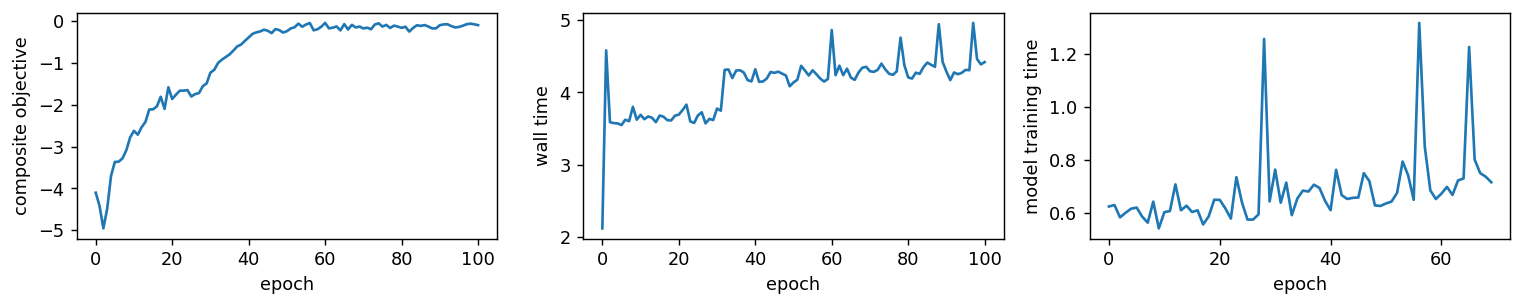

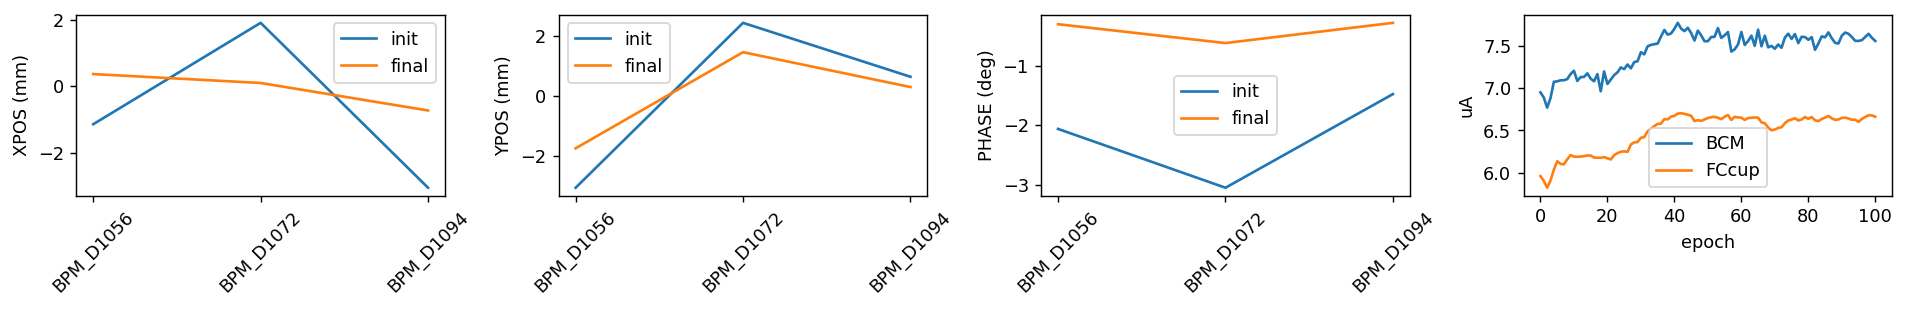

In [5]:
for f in files:
    print(f"===  {f} ===")
    plot_savo_file(f)
    plt.show()